# Visualization

The visualization landscape is diverse.<br>
There are many libraries available:<br>
![python visualization libraries](plots/PythonVisLandscape.jpg)

There are roughly three areas of interest:
* matplotlib and all derived packages like seaborn
* packages build around JavaScript, which offer interactivity in the browser. There exist a lot of different packages, but D3 & Vega are definitely important ones.
  * Bokeh
  * Altair
* packages build around OpenGL (or Vulcan) and WebGL which offer the highest speed but are usually overkill, mostly used for high computational load applications like real-time 3D image rendering with complex surfaces (games, medical imaging, ...). This group of tools is out of scope here.

The developement are fast, causing a scattered landscape (as is clear from the plot above). There have been multiple efforts to unify this landscape, but not very successfull (I guess one of few downsides of open-source). An initiative with a lot of cloud, trying to encourage and bring together a diverse set of tools under a single website is [PyViz](https://pyviz.org/index.html). The goal is to make everyone doing viz in Python more productive.

# Visualization Using Pandas

Lets start with some of the plotting functionality that comes with [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).<br>
The basic plotting functionality in pandas is implemented using Matplotlib.<br><br>
Note: There is an interesting package, hvplot, that will generate better looking and more interactive JavaScript based versions using almost the the same syntax. The only thing you need to do is to import it:
```python
import hvplot.pandas
```

In [4]:
import numpy as np
import pandas as pd

In [7]:
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

## Simple scatter plot

Give the x & y coordinates of the plot. Can also give a size and color column.<br>
When using the size and color, need to pass in as series and not as column names (suspect this is a bug that will get fixed).

In [76]:
df = pd.DataFrame({'x':np.random.randn(25), 'y':np.random.randn(25)})

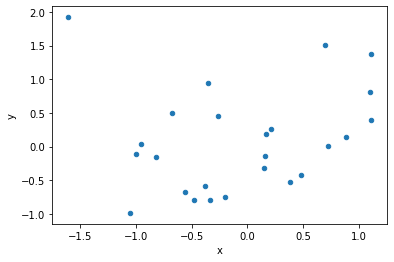

In [77]:
df.plot.scatter(x='x', y='y')

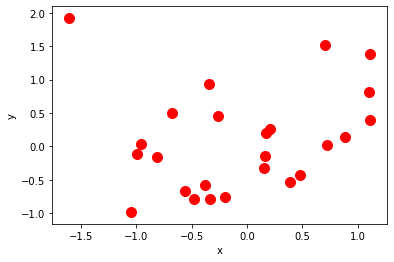

In [79]:
# s: size & c: color
df.plot.scatter(x='x', y='y', s=100, c='red')

In [111]:
np.random.choice([100,200,300], size=25)

array([300, 100, 300, 300, 100, 200, 200, 100, 200, 300, 100, 300, 100,
       100, 200, 100, 100, 200, 200, 300, 100, 100, 300, 100, 300])

In [242]:
df = pd.DataFrame({'x':  np.random.randn(25), 
                   'y':  np.random.randn(25), 
                   'sz': np.random.choice([10,100,1000], size=25),
                   'cl': np.random.choice(['red','blue','green','orange'], size=25)
                  })

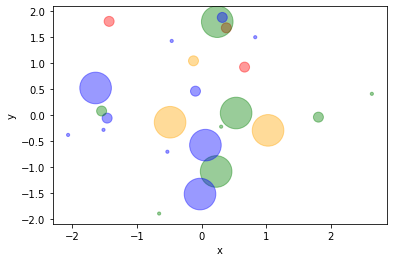

In [245]:
df.plot.scatter(x='x', y='y', s=df.sz, c=df.cl, alpha=0.4)

## TimeSeries

Each column is a timeseries.

In [230]:
df = pd.read_csv('data/GOOG.csv', index_col='Date')

In [233]:
df.index = pd.to_datetime(df.index)

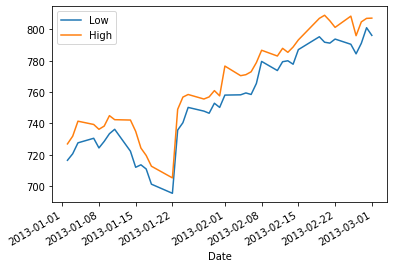

In [240]:
df.loc[df.index.year >= 2013][['Low','High']].plot.line()

## Area plot

Each column is a timeseries, that get stacked on top of each other and filling the area between.

In [255]:
dates = pd.date_range(start='2018/01/01', end='2018/05/01', freq='W')
df = pd.DataFrame({
    'soup':     np.random.choice(np.arange(10,21,5), size=len(dates)),
    'chips':    np.random.choice(np.arange(10,31,5), size=len(dates)),
    'sandwich': np.random.choice(np.arange(10,31,2), size=len(dates))
}, index=dates)

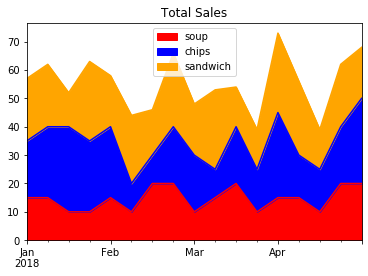

In [269]:
df.plot.area(color=['red','blue','orange'], legend='right', title='Total Sales')

## Pie Chart

Produces a Pie for column `y` where each category is defined in a row with label row index.

In [282]:
df = pd.DataFrame({'count':  [0.4, 0.6], 'ca_balance': [2e9, 0.5e9]}, index=['committed', 'not committed'])
df

,count,ca_balance
committed,0.4,2.000000e+09
not committed,0.6,5.000000e+08


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a719b10>,
      dtype=object)

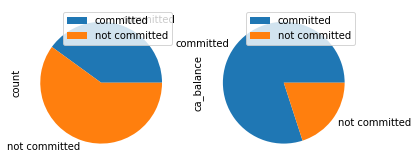

In [283]:
df.plot.pie(subplots=True)

In [284]:
# or, if we start with raw data ...
df = pd.DataFrame({'committed': np.random.choice(['yes','no'], p=[0.7,0.3], size=100),
                   'main':      np.random.choice(['yes','no','unknown'], p=[0.3,0.6,0.1], size=100)
                  })

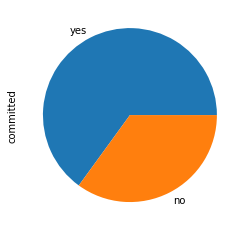

In [285]:
# aggregate and then plot
df.committed.value_counts().plot.pie()

## Heatmaps - Hexbin

Scatterplots loose their meaning when a lot of data is plotted.

scatterplot lose their meaning when too many data points are involved

In [287]:
df = pd.concat([
    pd.DataFrame({'x': +1 + 0.7 * np.random.randn(10_000), 'y': +1 + 0.7 * np.random.randn(10_000)}),
    pd.DataFrame({'x': -1 + 0.7 * np.random.randn(10_000), 'y': -1 + 0.7 * np.random.randn(10_000)}),
])

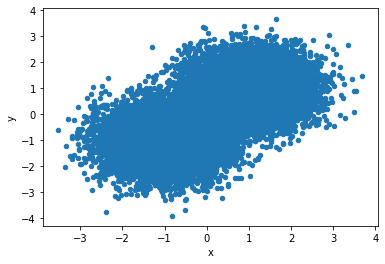

In [288]:
df.plot.scatter(x='x', y='y')

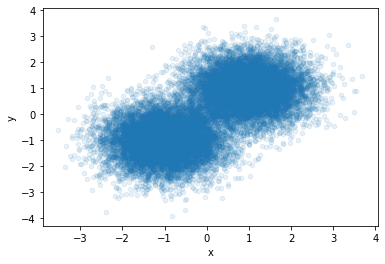

In [290]:
## using alpha helps is this scenario
df.plot.scatter(x='x', y='y', alpha=0.1)

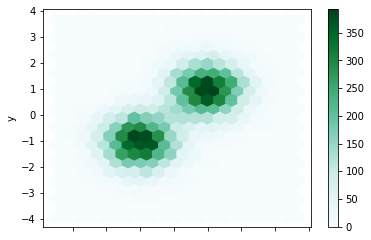

In [291]:
## but is is better to use a heatmap
df.plot.hexbin(x='x', y='y', gridsize=20)

Heatmaps are great tools and become more powerfull when there is more data. Exactly the case when scatterplots become less usefull. And, as an huge added bonus, they use a lot less memory when exported to a lot of formats, because they only store use the bincounts.  

## Histogram - KDE

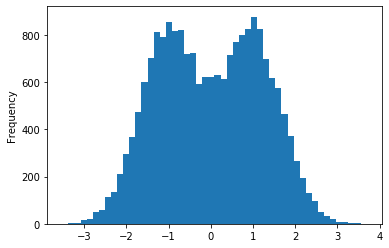

In [293]:
df.x.plot.hist(bins=50)

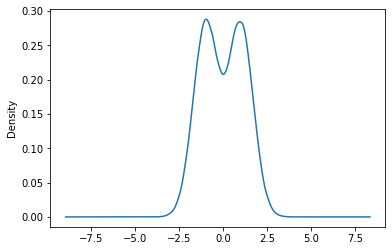

In [217]:
## pandas also gives a convenient way to get the Kernel Density Estimation of a variable ...
df.x.plot.kde()

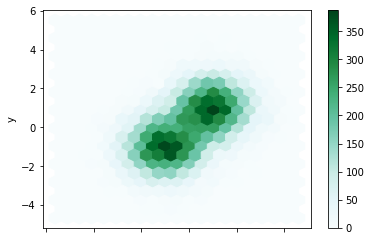

In [201]:
df.plot.hexbin(x='x', y='y', gridsize=20)

# Matplotlib

In the examples above Pandas offered a convenient way to plot using the Matplotlib library.<br>
Matplotlib has been the core libarary for plotting for many years. It is very powerfull and flexible, but also quite complex and code intensive to acchieve what you want. For this reason, many more user-friendly API have been developed. Seaborn is probably the best known one.<br>
Allthough more convenient API's exist, it pays to have a good understanding of Matplotlib. It will make it a lot easier to finetune your visuals.

## Basics

## Scatter Plots

## Line Plots

In [ ]:
# plot function
# fill area
# stacked plot

## Histograms

## Stem Plots

In [1]:
## simple
# timeline example

## 

# Seaborn

## Bubble Plot

## Kernel Density Plot

## Joint KDE Plot

# Modern Visualization Using JavaScript

## Bokeh

## HoloViews